# GWRATES complete exmaples

## Short BBH (Binary Black Hole) example with three detectors
* This part of the notebook is a short example to simulate a binary black hole mergers and calculate its rate ($yr^{-1}$).
* All generated data is saved in the `ler_data` folder.
* All interpolation data is saved in the `interpolator_pickle` folder.

In [1]:
# call the GWRATES class
from ler.rates import GWRATES

* class initialization
* if you want the models and its parameters to print.

    ```ler = GWRATES()```
    
* set 'npool' according to your machine's available CPU cores. Default is 4.
* to check no. of cores, 

    ```import multiprocessing as mp```
    
    ```print(mp.cpu_count())```

In [2]:
ler = GWRATES(verbose=False)

* simulation of the GW CBC population
* this will generate a json file with the simulated population parameters
* by default 100,000 events will be sampled with batches of 25,000. 
* results will be saved in the same directory as json file.
* resume=True will resume the simulation from the last saved batch.

In [3]:
param = ler.gw_cbc_statistics(resume=True)

simulated gw params will be stored in .ler_data/gw_param.json
chosen batch size = 25000 with total size = 100000
There will be 4 batche(s)
resuming from .ler_data/gw_param.json
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...


* generate detectable events
* note: here no input param is provided, so it will track the json file generated above
* final rate is the rate of detectable events

In [4]:
rate, param_detectable = ler.gw_rate()

getting gw_params from json file .ler_data/gw_param.json...
total gw rate (yr^-1) (with step function): 413.0563573223664
number of simulated unlensed detectable events: 399
number of all simulated unlensed events: 100000
storing detectable gw params in .ler_data/gw_param_detectable.json


* look for available parameters
* **Note:** This is for spin-less systems.

In [5]:
param_detectable.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])

* all gwrates initialization parameters, simulated parameters's json file names and rate results are strored as json file in the same directory
* Now, let's see all the LeR class initialization parameters. This is either get from the json file '.ler_data/gwrates_params.json' or from the ler object.

In [15]:
# let me introduce two of the most use function in ler
from ler.utils import load_json, append_json
ler_params = load_json('.ler_data/gwrates_params.json')
# ler_params = ler.gw_param_sampler_dict  # if you want to get it as an object
ler_params

{'npool': '4',
 'z_min': '0.0',
 'z_max': '10.0',
 'size': '100000',
 'batch_size': '25000',
 'cosmology': 'LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)',
 'snr_finder': '<bound method GWSNR.snr of <gwsnr.gwsnr.GWSNR object at 0x286c88b20>>',
 'json_file_names': "{'gwrates_param': '.ler_data/gwrates_params.json', 'gw_param': '.ler_data/gw_param.json', 'gw_param_detectable': '.ler_data/gw_param_detectable.json'}",
 'directory': './interpolator_pickle',
 'gw_param_sampler_dict': {'z_min': '0.0',
  'z_max': '10.0',
  'event_type': 'BBH',
  'source_priors': "{'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine'}",
  'source_priors_params': "{'merger_rate_density

* plotting the distribution of event parameters

getting gw_params from json file ./gw_param_detectable.json...
getting gw_params from json file ./gw_param.json...


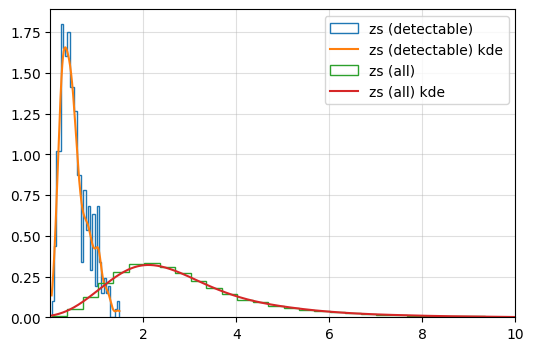

In [6]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt


# input param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name='zs',
    param_dict='./gw_param_detectable.json',
    plot_label='zs (detectable)',
)
lerplt.param_plot(
    param_name='zs',
    param_dict='./gw_param.json',
    plot_label='zs (all)',
)
plt.xlim(0.001,10)
plt.grid(alpha=0.4)
plt.show()

## Custom functions
* `ler` allows internal model functions to be change with custom functions.
* It also allows to change the default parameters of the existing model functions.

First let's look at what are the input parameters available for ler.GWRATES. The input paramters can divided into three categories

1. GWRATES set up params
2. CBCSourceParameterDistribution set up params (as kwargs)
3. GWSNR set up params (as kwargs)

In [1]:
from ler.rates import GWRATES
# default initialization
ler = GWRATES(npool=4, verbose=True)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_11.pickle
psds not given. Choosing bilby's default psds
npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  None
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_5.pickle
Interpolator 

As an example, I will change,

* merger_rate_density_params's default value of **local merger rate density** ($R_0$) to 2.5e-9 $Mpc^{-3} yr^{-1}$. But, I am still using the default merger_rate_density function, which is 'merger_rate_density_bbh_popI_II_oguri2018'.

* **source_frame_masses** to a custom function. This is similar to the internal default function, i.e. PowerLaw+Peak model. I am using `gwcosmo`'s powerlaw_gaussian prior for this example.

* `gwsnr` parameters: By default, it uses 'IMRPhenomD' **waveform model** with no spin. It uses interpolation method to find the 'snr' and it is super fast. But for the example below, I am using 'IMRPhenomXPHM` with precessing spins. This is without interpolation but through inner product method. It will be slower.

**Note:** All custom functions should have 'size' as the only input.

In [2]:
from gwcosmo import priors as p

# define your custom function of mass_1_source and mass_2_source calculation
# all ler internal functions are defined in a similar way
def powerlaw_peak(size):
    """
    Function to sample mass1 and mass2 from a powerlaw with a gaussian peak

    Parameters
    ----------
    size : `int`
        Number of samples to draw
    """

    # set the parameters
    mminbh=4.98
    mmaxbh=86.22
    alpha=2.63
    mu_g=33.07
    sigma_g=5.69
    lambda_peak=0.10
    delta_m=4.82
    beta=1.26

    model = p.BBH_powerlaw_gaussian(
        mminbh=mminbh,
        mmaxbh=mmaxbh,
        alpha=alpha,
        mu_g=mu_g,
        sigma_g=sigma_g,
        lambda_peak=lambda_peak,
        delta_m=delta_m,
        beta=beta,
    )
    # sample mass1 and mass2
    # you don't need to worry about mass_1_source>mass_2_source
    # ler will take care of that
    mass_1_source, mass_2_source = model.sample(Nsample=size)

    return (mass_1_source, mass_2_source)


* Initialize the class with the custom function
* changing gwrates input params

In [3]:
ler = GWRATES(npool=4, verbose=False,
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
        source_frame_masses=powerlaw_peak,
    ),
   source_priors_params=dict(
        merger_rate_density=dict(
            R0=2.9e-08,
            b2=1.6,
            b3=2.0,
            b4=30
        ),
        source_frame_masses=dict(
            mminbh=4.98,
            mmaxbh=86.22,
            alpha=2.63,
            mu_g=33.07,
            sigma_g=5.69,
            lambda_peak=0.10,
            delta_m=4.82,
            beta=1.26
        ),
   ),
   waveform_approximant = 'IMRPhenomXPHM',
   snr_type='inner_product',
   spin_zero=False,
   spin_precession=True,
)

* simulation of the GW CBC (compact-binary-coalescence) population
* you can set the batch size at the gwarates initialization too.
* or you can set it using the `batch_size` instance variable
* if the sample size is large, it is recommended to set the batch size to a large number, but it will consume more RAM memory or simply your machine's individual core won't be able to handle it.

In [5]:
ler.batch_size = 50000
ler.gw_cbc_statistics(size=100000, resume=False, output_jsonfile = './new_gw_params.json');

simulated gw params will be stored in ./new_gw_params.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40706/40706 [00:55<00:00, 728.57it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40796/40796 [00:56<00:00, 723.94it/s]


* you can also also called the generated parameters using an instance attribute. This instance attribute gets the dict from the json file generated above.
* This is for spin-precessing systems, and it will contain extra (spin-related) parameters.

In [6]:
param = ler.gw_param
print(param.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])


* generate detectable events
* and get the rate of detectable events
* You have two choice to input the generated parameters, either as json file name or as a dict

In [7]:
# ler.gw_rate(); # this is short hand for the following
rate, param_detectable = ler.gw_rate(
    gw_param='./new_gw_params.json',
    snr_threshold=8.0,
    output_jsonfile='./new_gw_params_detectable.json',
)

getting gw_params from json file ./new_gw_params.json...
total gw rate (yr^-1) (with step function): 909.9662608680703
number of simulated unlensed detectable events: 879
number of all simulated unlensed events: 100000
storing detectable gw params in ./new_gw_params_detectable.json


* to check all the stored json file names

In [9]:
ler.json_file_names

{'gwrates_param': '.ler_data/gwrates_params.json',
 'gw_param': './new_gw_params.json',
 'gw_param_detectable': './new_gw_params_detectable.json'}

* again you can call the generated detectable events' parameters using an instance attribute
* Note: The data is not stored in this instance attribute, it is stored in the json file. This scheme is used to save RAM memory.

In [10]:
param_detectable = ler.gw_param_detectable
print(param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])


### How to look for available model functions?

* All available names are stored as a dict in `ler` instance
* the keys of this dict shows the parameter type
* the values are also dict, where the keys are the model function names and the values are their input parameters

In [11]:
# let's look at one of the dict key
ler.available_gw_prior_list_and_its_params['source_frame_masses']

{'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98,
  'mmaxbh': 112.5,
  'alpha': 3.78,
  'mu_g': 32.27,
  'sigma_g': 3.88,
  'lambda_peak': 0.03,
  'delta_m': 4.8,
  'beta': 0.81},
 'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1},
 'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0,
  'sigma': 0.3,
  'beta': 1.1},
 'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0},
 'binary_masses_BNS_bimodal': {'w': 0.643,
  'muL': 1.352,
  'sigmaL': 0.08,
  'muR': 1.88,
  'sigmaR': 0.3,
  'mmin': 1.0,
  'mmax': 2.3}}

* for looking at the choosen models and its input parameters

In [12]:
print(ler.gw_param_samplers)
print(ler.gw_param_samplers_params)

{'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': <function powerlaw_peak at 0x17d7e70a0>, 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine', 'a_1': 'sampler_uniform', 'a_2': 'sampler_uniform', 'tilt_1': 'sampler_sine', 'tilt_2': 'sampler_sine', 'phi_12': 'sampler_uniform', 'phi_jl': 'sampler_uniform'}
{'merger_rate_density': {'R0': 2.9e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'source_frame_masses': {'mminbh': 4.98, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.1, 'delta_m': 4.82, 'beta': 1.26}, 'zs': None, 'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 'dec': None, 'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 'theta_jn': None, 'a_1': {'min_': 0.0, 'max_':

## Using internal model functions

* calling the default mass distribution model (directly).

In [13]:
mass_1_source, mass_2_source = ler.binary_masses_BBH_popI_II_powerlaw_gaussian(size=10000)
default_model = dict(mass_1_source=mass_1_source)

* let's do a comparision plot between you custom model and the default model

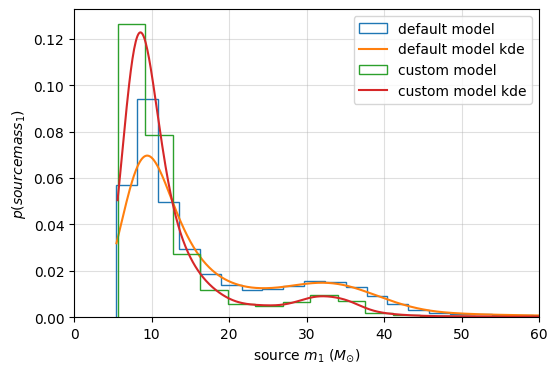

In [14]:
import matplotlib.pyplot as plt
# ler.utils has a function for plotting histograms and KDEs
from ler.utils import plots as lerplt

plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=param, # or the json file name
    plot_label='default model',
);
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=default_model,
    plot_label='custom model',
);
plt.xlabel(r'source $m_1$ ($M_{\odot}$)')
plt.ylabel(r'$p(source mass_1)$')
plt.xlim(0,60)
plt.grid(alpha=0.4)
plt.show()


## Selecting particular number of detectable events

* class initialization

In [1]:
from ler.rates import GWRATES
ler = GWRATES(verbose=False)

* sampling till desired number of detectable events are found

In [5]:
n_size_param = ler.selecting_n_gw_detectable_events(
    size=10000, 
    snr_threshold=8.0,
    batch_size=50000,
    output_jsonfile='gw_params_n_detectable.json',
    meta_data_file="meta_gw.json",
    resume=False,
    trim_to_size=True,
    )

collected number of events =  0
collected number of events =  216
total number of events =  50000
total gw rate (yr^-1): 447.21891319113354
collected number of events =  423
total number of events =  100000
total gw rate (yr^-1): 437.9018524996516
collected number of events =  645
total number of events =  150000
total gw rate (yr^-1): 445.1484552596931
collected number of events =  855
total number of events =  200000
total gw rate (yr^-1): 442.56038284539255
collected number of events =  1038
total number of events =  250000
total gw rate (yr^-1): 429.8270665670339
collected number of events =  1258
total number of events =  300000
total gw rate (yr^-1): 434.10601295867747
collected number of events =  1449
total number of events =  350000
total gw rate (yr^-1): 428.58479180816965
collected number of events =  1648
total number of events =  400000
total gw rate (yr^-1): 426.5143338767292
collected number of events =  1874
total number of events =  450000
total gw rate (yr^-1): 431.11

**Important Note**: At each iteration, rate is calculated using the cummulatively increasing number of events. It become stable at around 2 million events. This is the number of events that is required to get a stable rate.

* Now get the sampled (detectable) events.

In [3]:
print(n_size_param.keys())
print(f"size of each parameters={len(n_size_param['zs'])}")

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
size of each parameters=1000


* let's see the meta file

In [4]:
from ler.utils import load_json

meta = load_json('ler_data/meta_gw.json')
print(meta)

{'events_total': [50000, 100000, 150000, 200000, 250000], 'total_rate': [416.16204421952705, 428.58479180816965, 434.79616560249093, 445.66606974255325, 447.21891319113354]}


## Utilizing the ANN feature of the `gwsnr`

* This particularly useful when you are considering spin-precessing systems.
* inner product method is slow, ann method is faster alternative.
* But it is not very accurate in calculating the absolute value snr, but it is fine for checking the detectability of the events (accuracy>98%).
* The example below is important when you want the accurate SNR value only for the detectable events. 

In [1]:
from ler.rates import GWRATES
# class initialization
ler = GWRATES(verbose=False, batch_size=100000, snr_type='ann', waveform_approximant='IMRPhenomXPHM')

In [2]:
# event sampling
# make size=1000000 for better statistics
ler.gw_cbc_statistics(size=200000, resume=False, output_jsonfile = './gw_params.json');


simulated gw params will be stored in ./gw_params.json
chosen batch size = 100000 with total size = 200000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...


In [4]:
# rate calculation
# snr recalculation
ler.gw_rate(snr_threshold=8.0, 
            output_jsonfile='./gw_params_detectable.json',
            snr_recalculation=True,  # if True, it will recalculate the SNR with inner product method
            threshold_snr_recalculation=6.0,  # re-calculate SNR for events with SNR greater than this value
            );

getting gw_params from json file ./gw_params.json...


100%|██████████████████████████████████████████████████████████| 2255/2255 [00:06<00:00, 353.82it/s]

total gw rate (yr^-1) (with step function): 458.0888173311958
number of simulated gw detectable events: 885
number of all simulated gw events: 200000
storing detectable gw params in ./gw_params_detectable.json


* Now let's repeat the above example with the `inner product` method to check the accuracy of the `ann` method.
* This will take a while to run.
* as of 24.02.2024 `ann` is available only for default detector network and psds.
* contact the author for custom detector network and psds, or you can do it yourself by following the `gwsnr`'s ann model development example.

In [5]:
from ler.rates import GWRATES
# class initialization
ler = GWRATES(verbose=False, batch_size=100000, snr_type='inner_product', waveform_approximant='IMRPhenomXPHM')
# event sampling
# 
ler.gw_cbc_statistics(size=200000, resume=False, output_jsonfile = './gw_params.json');
# rate calculation
ler.gw_rate(snr_threshold=8.0, 
            output_jsonfile='./gw_params_detectable.json',
            );

simulated gw params will be stored in ./gw_params.json
chosen batch size = 100000 with total size = 200000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 92554/92554 [01:52<00:00, 822.55it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 92679/92679 [01:53<00:00, 818.55it/s]


getting gw_params from json file ./gw_params.json...
total gw rate (yr^-1) (with step function): 469.99395043697825
number of simulated gw detectable events: 908
number of all simulated gw events: 200000
storing detectable gw params in ./gw_params_detectable.json


* close enough
* For more matching results, you can increase the number of events to 1000,000 or more.

## BNS (Binary Neutron Star) example

* All you need is to change `event_type` in class initialization to 'BNS'.
* But in this example, I will also change the detector network to ['CE', 'ET']. These are future 3rd generation detectors. Since, they are more sensitive, I will change the redshift range to 0-20 (z_max=20).
* The default mass distribution model has a mass-cutoff of 2.3 Msun. So, the maximum possible redshifted total mass is (2.3+2.3)*(1+z_max)=96.6. This allows, gwsnr to have a good interpolation for the snr values.
* Difference in the models for BNS and BBH are:
    * mass distribution model: bimodal distribution. Refer to [Will M. Farr et al. 2020](https://arxiv.org/pdf/2005.00032.pdf) Eqn. 6
    * merger rate density model parameter: local merger rate density value from [GWTC-3 catalog, Section IV A](https://journals.aps.org/prx/pdf/10.1103/PhysRevX.13.011048).

In [8]:
from ler.rates import GWRATES

ler = GWRATES(event_type='BNS', ifos=['CE', 'ET'], z_min=0, z_max=20, mtot_max=96.6, verbose=True)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_5.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_6.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_16.pickle
binary_masses_BNS_bimodal interpolator will be loaded from ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 96.6
detectors:  None
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be generated

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [02:49<00:00,  3.40s/it]


 GWRATES set up params:
npool =  4
z_min =  0
z_max =  20
event_type =  BNS
size =  100000
batch_size =  25000
cosmology =  LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
snr_finder =  <bound method GWSNR.snr of <gwsnr.gwsnr.GWSNR object at 0x2fb6ab7c0>>
json_file_names =  {'gwrates_param': 'gwrates_params.json', 'gw_param': 'gw_param.json', 'gw_param_detectable': 'gw_param_detectable.json'}
interpolator_directory =  ./interpolator_pickle

 GWRATES also takes CBCSourceParameterDistribution params as kwargs, as follows:
source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': 'binary_masses_BNS_bimodal', 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine'}
source_priors_params= {'merger_rate_density': {'R0': 1.0550000000000001e-07, 'b2': 1.6, 'b

In [9]:
ler.batch_size = 100000
param = ler.gw_cbc_statistics(size=200000, resume=False, save_batch=False)

simulated gw params will be stored in gw_param.json
chosen batch size = 100000 with total size = 200000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...


In [10]:
ler.gw_rate();

getting gw_params from json file gw_param.json...
total gw rate (yr^-1) (with step function): 37601.9121178544
number of simulated gw detectable events: 72279
number of all simulated gw events: 200000
storing detectable gw params in gw_param_detectable.json


* Let's plot the redshift and mass distribution

In [13]:
import matplotlib.pyplot as plt
# ler.utils has a function for plotting histograms and KDEs
from ler.utils import plots as lerplt

params = ler.gw_param
params_detectable = ler.gw_param_detectable

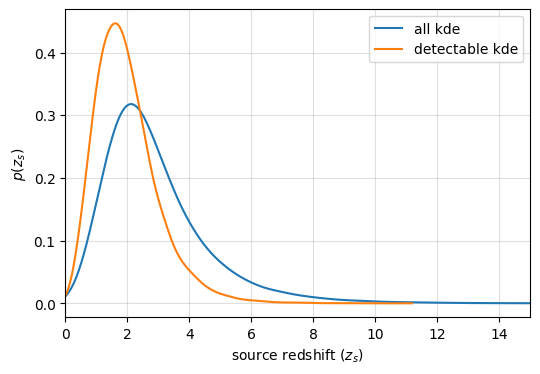

In [18]:
# sample source redshifts (source frame)
zs = params['zs']
zs_detectable = params_detectable['zs']

plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="zs", 
    param_dict=params, # or the json file name
    plot_label='all',
    histogram=False,
);
lerplt.param_plot(
    param_name="zs", 
    param_dict=params_detectable,
    plot_label='detectable',
    histogram=False,
);
plt.xlabel(r'source redshift ($z_s$)')
plt.ylabel(r'$p(z_s)$')
plt.xlim(0,15)
plt.grid(alpha=0.4)
plt.show()


* From this result, it should be known that you could set z_max lower (as well as mtot_max).

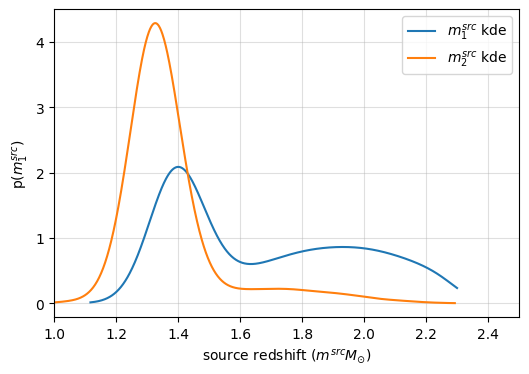

In [26]:
# sample source mass_distribution (source frame)

plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=params, # or the json file name
    plot_label=r"$m_1^{src}$",
    histogram=False,
);
lerplt.param_plot(
    param_name="mass_2_source", 
    param_dict=params,
    plot_label=r"$m_2^{src}$",
    histogram=False,
);
plt.xlabel(r'source redshift ($m^{src} M_{\odot}$)')
plt.ylabel(r'p($m_1^{src}$)')
plt.xlim(1,2.5)
plt.grid(alpha=0.4)
plt.show()

In [1]:
from ler.rates import GWRATES

ler = GWRATES(verbose=False)

In [15]:
# not there, True, True, tick,
# not there, False, True, tick
# not there, True, False, tick
# not there, False, False, tick
# there   , True, True, tick
# there   , False, True, tick
# there   , True, False 
# there   , False, False, tick
ler.batch_size = 1000
ler.gw_cbc_statistics(size=2000, save_batch=True, resume=False)

simulated gw params will be stored in gw_param.json
chosen batch size = 1000 with total size = 2000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...


{'zs': array([2.05221256, 2.50094846, 5.82367582, ..., 2.09819628, 1.86314741,
        1.95342362]),
 'geocent_time': array([1.24103312e+09, 1.25286744e+09, 1.26158077e+09, ...,
        1.24673124e+09, 1.24479008e+09, 1.24751294e+09]),
 'ra': array([0.19451262, 3.63656735, 2.21746415, ..., 5.76174319, 2.32931808,
        1.65226601]),
 'dec': array([-0.50524013,  0.56878074, -0.0406981 , ...,  0.10451519,
        -0.01834611, -1.0892001 ]),
 'phase': array([3.09417081, 1.62308326, 1.23148053, ..., 3.88609118, 6.04809362,
        2.46257108]),
 'psi': array([2.33883473e+00, 1.72515134e-04, 1.22053801e+00, ...,
        7.27115388e-01, 2.05127292e-01, 1.59175865e+00]),
 'theta_jn': array([2.51588719, 1.05927266, 2.07082605, ..., 0.60602851, 0.59570893,
        1.4817423 ]),
 'luminosity_distance': array([16037.38562806, 20405.7842649 , 55758.34859306, ...,
        16477.75478078, 14246.60630127, 15097.57751899]),
 'mass_1_source': array([ 7.88750654, 13.87509178,  9.08419757, ...,  7.5599

In [3]:
ler.selecting_n_gw_detectable_events(size=20, batch_size=1000, resume=True);

collected number of events =  20
storing detectable gw params in ./ler_data/gw_params_n_detectable.json
trmming final result to size=20
